## 精准率和召回率

### 加载数据

In [1]:
import numpy as np

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
X = digits.data
y = digits.target.copy()

In [5]:
y[digits.target==9]=1
y[digits.target!=9]=0

### 分割数据

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 666)

### 训练模型

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
log_reg = LogisticRegression()

In [10]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
log_reg.score(X_test,y_test)

0.97555555555555551

In [12]:
y_predict = log_reg.predict(X_test)

### TN TP FN FP

In [13]:
def TN(y_true,y_predict):
    return np.sum((y_true==0) &(y_predict==0))

In [14]:
def TP(y_true,y_predict):
    return np.sum((y_true==1) &(y_predict==1))

In [15]:
def FP(y_true,y_predict):
    return np.sum((y_true==0) &(y_predict==1))

In [16]:
def FN(y_true,y_predict):
    return np.sum((y_true==1) &(y_predict==0))

### 混淆矩阵

In [17]:
def confusion_matrix(y_true,y_predict):
    return np.array(
    [[TN(y_true,y_predict),FP(y_true,y_predict)],
    [FN(y_true,y_predict),TP(y_true,y_predict)]]
    )

In [18]:
confusion_matrix(y_test,y_predict)

array([[403,   2],
       [  9,  36]])

#### sklearn中的混淆矩阵

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(y_test,y_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

### 精准率和召回率

In [21]:
def precision_score(y_true,y_predict):
    return TP(y_true,y_predict)/(FP(y_true,y_predict)+TP(y_true,y_predict))

def recall_score(y_true,y_predict):
    return TP(y_true,y_predict)/(FN(y_true,y_predict)+TP(y_true,y_predict))

In [22]:
precision_score(y_test,y_predict)

0.94736842105263153

In [23]:
recall_score(y_test,y_predict)

0.80000000000000004

#### sklearn中的精准率和召回率

In [24]:
from sklearn.metrics import precision_score

In [25]:
precision_score(y_test,y_predict)

0.94736842105263153

In [26]:
from sklearn.metrics import recall_score

In [27]:
recall_score(y_test,y_predict)

0.80000000000000004

### f1 SCORE

In [28]:
from sklearn.metrics import f1_score

In [29]:
f1_score(y_test,y_predict)

0.86746987951807231

### predict的结果是基于 theta.T*x大于0 来决定的。因此我们可以改变 0 这个界限 来改变精准率和召回率（精准率和召回率是相互矛盾的 不能同时提高 我们只能找到一个平衡点是个f1_socre更好）

In [31]:
decision_value= log_reg.decision_function(X_test)

#### 将决策分界线定为5

In [32]:
y_predict_bias5 = np.array(decision_value>5,dtype=int)

In [33]:
precision_score(y_test,y_predict_bias5)

0.95999999999999996

In [34]:
recall_score(y_test,y_predict_bias5)

0.53333333333333333

#### 将决策分界线定为-5

In [36]:
y_predict_bias5 = np.array(decision_value>-5,dtype=int)

In [37]:
precision_score(y_test,y_predict_bias5)

0.72727272727272729

In [38]:
recall_score(y_test,y_predict_bias5)

0.88888888888888884

#### 以下证明了该函数就是theta.T.dot(X)

In [45]:
log_reg.decision_function(X_test)

array([-22.05700117, -33.02940957, -16.21334087, -80.3791447 ,
       -48.25125396, -24.54005629, -44.39168773, -25.04292757,
        -0.97829292, -19.7174399 , -66.25139191, -51.09600903,
       -31.49348767, -46.05335761, -38.67875653, -29.80471251,
       -37.58849546, -82.57569732, -37.81903096, -11.01165509,
        -9.17439784, -85.13004331, -16.71617974, -46.23725224,
        -5.32992784, -47.91762441, -11.66729524, -39.1960157 ,
       -25.25293243, -14.3664722 , -16.99783066, -28.91904826,
       -34.33940562, -29.47603768,  -7.85812845,  -3.82094912,
       -24.08161558, -22.16362592, -33.61218699, -23.14023293,
       -26.9180406 , -62.3893701 , -38.85690022, -66.77259733,
       -20.14482853, -17.47886658, -18.06799819, -22.22224569,
       -29.62302848, -19.73171824,   1.49552053,   8.32079827,
       -36.29307324, -42.50732725, -25.90460192, -34.98959422,
        -8.42010631, -50.04725431, -51.48208247,  19.88958588,
        -8.91888462, -31.99343636, -11.66099193,  -0.47

In [44]:
X_test.dot(log_reg.coef_.T)+log_reg.intercept_

array([[-22.05700117],
       [-33.02940957],
       [-16.21334087],
       [-80.3791447 ],
       [-48.25125396],
       [-24.54005629],
       [-44.39168773],
       [-25.04292757],
       [ -0.97829292],
       [-19.7174399 ],
       [-66.25139191],
       [-51.09600903],
       [-31.49348767],
       [-46.05335761],
       [-38.67875653],
       [-29.80471251],
       [-37.58849546],
       [-82.57569732],
       [-37.81903096],
       [-11.01165509],
       [ -9.17439784],
       [-85.13004331],
       [-16.71617974],
       [-46.23725224],
       [ -5.32992784],
       [-47.91762441],
       [-11.66729524],
       [-39.1960157 ],
       [-25.25293243],
       [-14.3664722 ],
       [-16.99783066],
       [-28.91904826],
       [-34.33940562],
       [-29.47603768],
       [ -7.85812845],
       [ -3.82094912],
       [-24.08161558],
       [-22.16362592],
       [-33.61218699],
       [-23.14023293],
       [-26.9180406 ],
       [-62.3893701 ],
       [-38.85690022],
       [-66

## 可视化precision 和 recall

In [49]:
thresholds = np.arange(decision_value.min(),decision_value.max(),0.1)

In [50]:
precisions = []
recalls = []
for threshold in thresholds:
    predict_y = np.array(decision_value > threshold,dtype="int")
    precisions.append(precision_score(y_test,predict_y))
    recalls.append(recall_score(y_test,predict_y))
    

In [51]:
import matplotlib.pyplot as plt

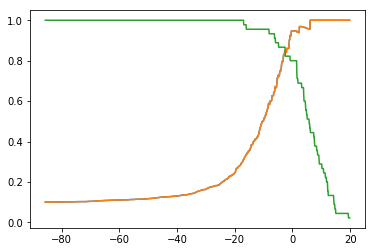

In [54]:
plt.plot(thresholds,precisions)
plt.plot(thresholds,recalls)
plt.show()

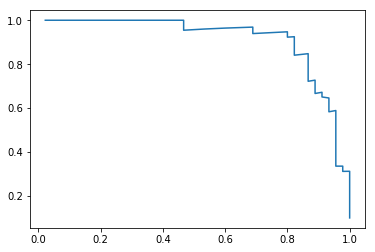

In [55]:
plt.plot(recalls,precisions)
plt.show()

### 利用sklearn可视化

In [56]:
from sklearn.metrics import precision_recall_curve

In [59]:
precisions,recalls,thresholds = precision_recall_curve(y_test,decision_value)

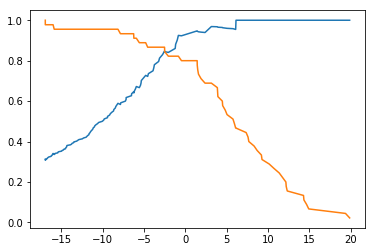

In [61]:
plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])
plt.show()

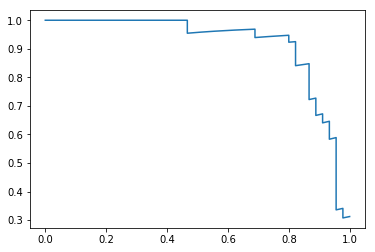

In [62]:
plt.plot(recalls,precisions)
plt.show()

In [63]:
recalls[-1]

0.0

In [64]:
precisions[-1]

1.0

## ROC and ROC_AUC

In [65]:
from sklearn.metrics import roc_curve

In [70]:
fprs,tprs = roc_curve?

In [71]:
fprs,tprs,thresholds = roc_curve(y_test,decision_value)

In [76]:
plt.plot(fprs,tprs)
plt.xlabel("FPR")
plt.ylabel("TPR")

Text(0,0.5,'TPR')

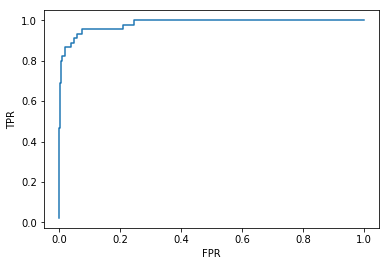

In [77]:
plt.show()

In [78]:
from sklearn.metrics import roc_auc_score

In [79]:
roc_auc_score(y_test,decision_value)

0.98304526748971188